# LANGUAGE POPULARITY PREDICTION FOR 2019
<p><i>Based on Stackoverflow Survey Responses from 2016-18</i></p>

In [1]:
import pandas as pd
from collections import defaultdict
from statsmodels.tsa.arima_model import ARIMA
import numpy as np

In [2]:
df_2018 = pd.read_csv("2018.csv")
df_2017 = pd.read_csv("2017.csv")
df_2016 = pd.read_csv("2016.csv")

/Users/anirudhkulkarni/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
print(df_2018.LanguageWorkedWith[:5])
print(df_2017.HaveWorkedLanguage[:5])
print(df_2016.tech_do[:5])

0                          JavaScript;Python;HTML;CSS
1                        JavaScript;Python;Bash/Shell
2                                                 NaN
3    C#;JavaScript;SQL;TypeScript;HTML;CSS;Bash/Shell
4                  C;C++;Java;Matlab;R;SQL;Bash/Shell
Name: LanguageWorkedWith, dtype: object
0                            Swift
1    JavaScript; Python; Ruby; SQL
2                Java; PHP; Python
3           Matlab; Python; R; SQL
4                              NaN
Name: HaveWorkedLanguage, dtype: object
0                 NaN
1    iOS; Objective-C
2                 NaN
3                 NaN
4                 NaN
Name: tech_do, dtype: object


<h3>Data cleaning and preparation</h3>
<p> In this step, we use methods to split and aggregate the responses for each year.</p>

In [4]:
dict_2018 = defaultdict(int)
temp = []
for index, row in df_2018.iterrows():
    #print(row.LanguageWorkedWith)
    temp = str(row.LanguageWorkedWith).split(";") 
    for lang in temp:
        dict_2018[lang] += 1
dict_2018.items()

[('VBA', 3810),
 ('TypeScript', 13626),
 ('Java', 35521),
 ('Scala', 3420),
 ('JavaScript', 54686),
 ('Haskell', 1961),
 ('Lua', 2733),
 ('Matlab', 4564),
 ('Erlang', 886),
 ('Clojure', 1032),
 ('Assembly', 5760),
 ('Python', 30359),
 ('nan', 20521),
 ('CoffeeScript', 2603),
 ('HTML', 53628),
 ('Rust', 1857),
 ('Kotlin', 3508),
 ('Ruby', 7911),
 ('Groovy', 3373),
 ('C', 18042),
 ('VB.NET', 5254),
 ('Hack', 254),
 ('Ocaml', 470),
 ('C++', 19872),
 ('Objective-C', 5510),
 ('R', 4813),
 ('Perl', 3280),
 ('CSS', 50979),
 ('Delphi/Object Pascal', 2025),
 ('Bash/Shell', 31172),
 ('Swift', 6310),
 ('Julia', 430),
 ('C#', 26954),
 ('F#', 1115),
 ('Cobol', 590),
 ('SQL', 44670),
 ('Go', 5532),
 ('PHP', 24071),
 ('Visual Basic 6', 3087)]

In [5]:
dict_2017 = defaultdict(int)
temp = []
for index, row in df_2017.iterrows():
    #print(row.LanguageWorkedWith)
    temp = str(row.HaveWorkedLanguage).split("; ") 
    for lang in temp:
        dict_2017[lang] += 1
dict_2017.items()

[('VBA', 1574),
 ('TypeScript', 3488),
 ('Java', 14524),
 ('Scala', 1309),
 ('JavaScript', 22875),
 ('Perl', 1585),
 ('Lua', 1039),
 ('Matlab', 1569),
 ('Erlang', 281),
 ('Assembly', 1823),
 ('Python', 11704),
 ('nan', 14767),
 ('Common Lisp', 273),
 ('Dart', 145),
 ('CoffeeScript', 1192),
 ('F#', 457),
 ('Elixir', 380),
 ('Swift', 2368),
 ('Groovy', 1193),
 ('C', 6974),
 ('VB.NET', 2273),
 ('Hack', 107),
 ('C++', 8155),
 ('Objective-C', 2349),
 ('R', 1634),
 ('Clojure', 391),
 ('Rust', 416),
 ('Ruby', 3324),
 ('Julia', 138),
 ('C#', 12476),
 ('Haskell', 649),
 ('Visual Basic 6', 1071),
 ('SQL', 18754),
 ('Go', 1557),
 ('PHP', 10290),
 ('Smalltalk', 327)]

In [6]:
df_2016 = pd.read_csv("2016.csv")
dict_2016 = defaultdict(int)
temp = []
for index, row in df_2016.iterrows():
    #print(row.LanguageWorkedWith)
    temp = str(row.tech_do).split("; ") 
    for lang in temp:
        dict_2016[lang] += 1
dict_2016.items()

[('SharePoint', 853),
 ('Java', 17942),
 ('Scala', 1602),
 ('Windows Phone', 1123),
 ('JavaScript', 27385),
 ('Redis', 2862),
 ('Hadoop', 1012),
 ('Perl', 1624),
 ('Matlab', 1602),
 ('Android', 8601),
 ('Cordova', 1651),
 ('SQL Server', 9306),
 ('C#', 15283),
 ('ReactJS', 2541),
 ('nan', 7005),
 ('Dart', 222),
 ('CoffeeScript', 1662),
 ('Haskell', 813),
 ('AngularJS', 8823),
 ('Spark', 707),
 ('Ruby', 4383),
 ('C', 7678),
 ('Salesforce', 665),
 ('Swift', 2746),
 ('Cloud (AWS, GAE, Azure, etc.)', 4629),
 ('iOS', 4498),
 ('C++', 9589),
 ('Objective-C', 3202),
 ('R', 1632),
 ('Clojure', 556),
 ('Rust', 436),
 ('MongoDB', 4780),
 ('Node.js', 8509),
 ('Python', 12282),
 ('LAMP', 4821),
 ('F#', 484),
 ('WordPress', 4496),
 ('SQL', 21976),
 ('Go', 1547),
 ('Visual Basic', 3312),
 ('PHP', 12780),
 ('Arduino / Raspberry Pi', 3797),
 ('Cassandra', 663)]

### Predict the popularity of languages that are common for years 2016-18
<p>Done by making use of set intersection</p>

In [7]:
languages = set(dict_2018.keys()).intersection(set(dict_2017.keys()))
languages = set(languages).intersection(set(dict_2016.keys()))
print(languages)

set(['Java', 'Scala', 'JavaScript', 'Perl', 'Matlab', 'Python', 'nan', 'CoffeeScript', 'F#', 'Ruby', 'C', 'C++', 'Objective-C', 'R', 'Clojure', 'Rust', 'Swift', 'C#', 'Haskell', 'SQL', 'Go', 'PHP'])


In [8]:
dict_comb = defaultdict(list)

### Popularity Index
<p>A new metric named <i>popularity index</i> is defined to quantify the popularity of languages. It is the ratio of number of people who know or have used a language over the total number of responses for that year.</p>
<p>For example, in the year 2017 the total number of responses recorded is <i>x</i> and out of these <i>x</i> responses, <i>y</i> number of people know python. Then, the popularity index of python for 2017 is <i>y</i> over <i>x</i></p>

### Normalize Method
<p> This method evaluates the popularity index for a given year and stores the result.

In [9]:
def normalize(d, total):
    for key, value in d.iteritems():
        if key != 'nan' and key in languages:
            dict_comb[key].append(1.0 * value/total)

In [10]:
def test(d, total):
    for key, value in d.iteritems():
        if key != 'nan' and key in languages and key == 'Python':
            print(key, value, total, 1.0 * value/total)

In [11]:
normalize(dict_2016, len(df_2016.index))
normalize(dict_2017, len(df_2017.index))
normalize(dict_2018, len(df_2018.index))

In [12]:
test(dict_2016, len(df_2016.index))
test(dict_2017, len(df_2017.index))
test(dict_2018, len(df_2018.index))

('Python', 12282, 56030, 0.2192039978582902)
('Python', 11704, 51392, 0.22773972602739725)
('Python', 30359, 98855, 0.30710636791259927)


In [14]:
print(dict_comb)

defaultdict(<type 'list'>, {'C': [0.13703373192932358, 0.13570205479452055, 0.18250973648272723], 'Python': [0.2192039978582902, 0.22773972602739725, 0.30710636791259927], 'Java': [0.3202213100124933, 0.2826120797011208, 0.35932426280916496], 'Scala': [0.02859182580760307, 0.025470890410958905, 0.03459612563856153], 'C#': [0.27276459039800105, 0.2427615193026152, 0.2726619796671893], 'Swift': [0.04900945921827592, 0.0460772104607721, 0.06383086338576703], 'JavaScript': [0.48875602355880776, 0.4451081880448319, 0.5531940721258409], 'C++': [0.17114046046760664, 0.15868228518057284, 0.20102169844722068], 'Perl': [0.028984472603962162, 0.03084137608966376, 0.03317990996914673], 'CoffeeScript': [0.029662680706764234, 0.023194271481942714, 0.026331495624905166], 'Objective-C': [0.05714795645190077, 0.04570750311332503, 0.055738202417682466], 'Haskell': [0.014510083883633767, 0.012628424657534247, 0.0198371351980173], 'Matlab': [0.02859182580760307, 0.030530043586550436, 0.04616863082292246],

In [17]:
data = np.array(list(dict_comb['Python']))
model = ARIMA(data, order=(0,1,0))
model_fit = model.fit(disp=0)
# print(model_fit.summary())
prediction = model_fit.predict(3, 3, typ='levels')
print(prediction)

[0.35105755]


In [49]:
popularity_index_2019 = defaultdict(float)

### Autoregressive Integrated Moving Average (ARIMA) to predict the popularity for 2019
<p>An ARIMA model is a class of statistical models for analyzing and forecasting time series data. </p>

In [50]:
def predict_popularity(lang):
    data = np.array(list(dict_comb[lang]))
    model = ARIMA(data, order=(0,1,0))
    model_fit = model.fit(disp=0)
    # print(model_fit.summary())
    prediction = model_fit.predict(3, 3, typ='levels')
    return prediction[0]

In [51]:
predict_popularity('Python')

0.3510575523984412

In [52]:
for key, value in dict_comb.iteritems():
    if key != 'nan' and key in languages:
        # print(key, predict_popularity(key))
        popularity_index_2019[key] = predict_popularity(key)

In [65]:
print(popularity_index_2019)

defaultdict(<type 'float'>, {'C': 0.20524773796957207, 'Ruby': 0.0809264761555377, 'Java': 0.37887573866937085, 'Scala': 0.03759827529495144, 'Python': 0.3510575523984412, 'CoffeeScript': 0.024665902887665084, 'JavaScript': 0.5854130958150691, 'C++': 0.21596231706723204, 'Perl': 0.03527762864667466, 'C#': 0.2726106737480172, 'Objective-C': 0.05503332501510973, 'Haskell': 0.02250066075801034, 'Matlab': 0.054957033118944384, 'F#': 0.012599604530761626, 'SQL': 0.48170170734045925, 'Go': 0.07013602115394277, 'R': 0.058467580412670375, 'Clojure': 0.010697671158813659, 'Swift': 0.07124156525965472, 'PHP': 0.2512010315369831, 'Rust': 0.02428686087884626})


In [84]:
plot_dict = defaultdict(dict)

In [86]:
for key, value in popularity_index_2019.iteritems():
    temp_dict = defaultdict(float)
    temp_dict['2016'] = dict_comb[key][0];
    temp_dict['2017'] = dict_comb[key][1];
    temp_dict['2018'] = dict_comb[key][2];
    temp_dict['2019'] = value;
    # print(temp_dict.items())
    plot_dict[key] = temp_dict
print(plot_dict.items())

[('C', defaultdict(<type 'float'>, {'2017': 0.13570205479452055, '2016': 0.13703373192932358, '2019': 0.20524773796957207, '2018': 0.18250973648272723})), ('PHP', defaultdict(<type 'float'>, {'2017': 0.20022571606475717, '2016': 0.22809209352132787, '2019': 0.2512010315369831, '2018': 0.24349805270345456})), ('Java', defaultdict(<type 'float'>, {'2017': 0.2826120797011208, '2016': 0.3202213100124933, '2019': 0.37887573866937085, '2018': 0.35932426280916496})), ('Scala', defaultdict(<type 'float'>, {'2017': 0.025470890410958905, '2016': 0.02859182580760307, '2019': 0.03759827529495144, '2018': 0.03459612563856153})), ('Python', defaultdict(<type 'float'>, {'2017': 0.22773972602739725, '2016': 0.2192039978582902, '2019': 0.3510575523984412, '2018': 0.30710636791259927})), ('Swift', defaultdict(<type 'float'>, {'2017': 0.0460772104607721, '2016': 0.04900945921827592, '2019': 0.07124156525965472, '2018': 0.06383086338576703})), ('JavaScript', defaultdict(<type 'float'>, {'2017': 0.44510818

defaultdict(<type 'float'>, {'2017': 0.13570205479452055, '2016': 0.13703373192932358, '2019': 0.20524773796957207, '2018': 0.18250973648272723})


<IPython.core.display.Javascript object>


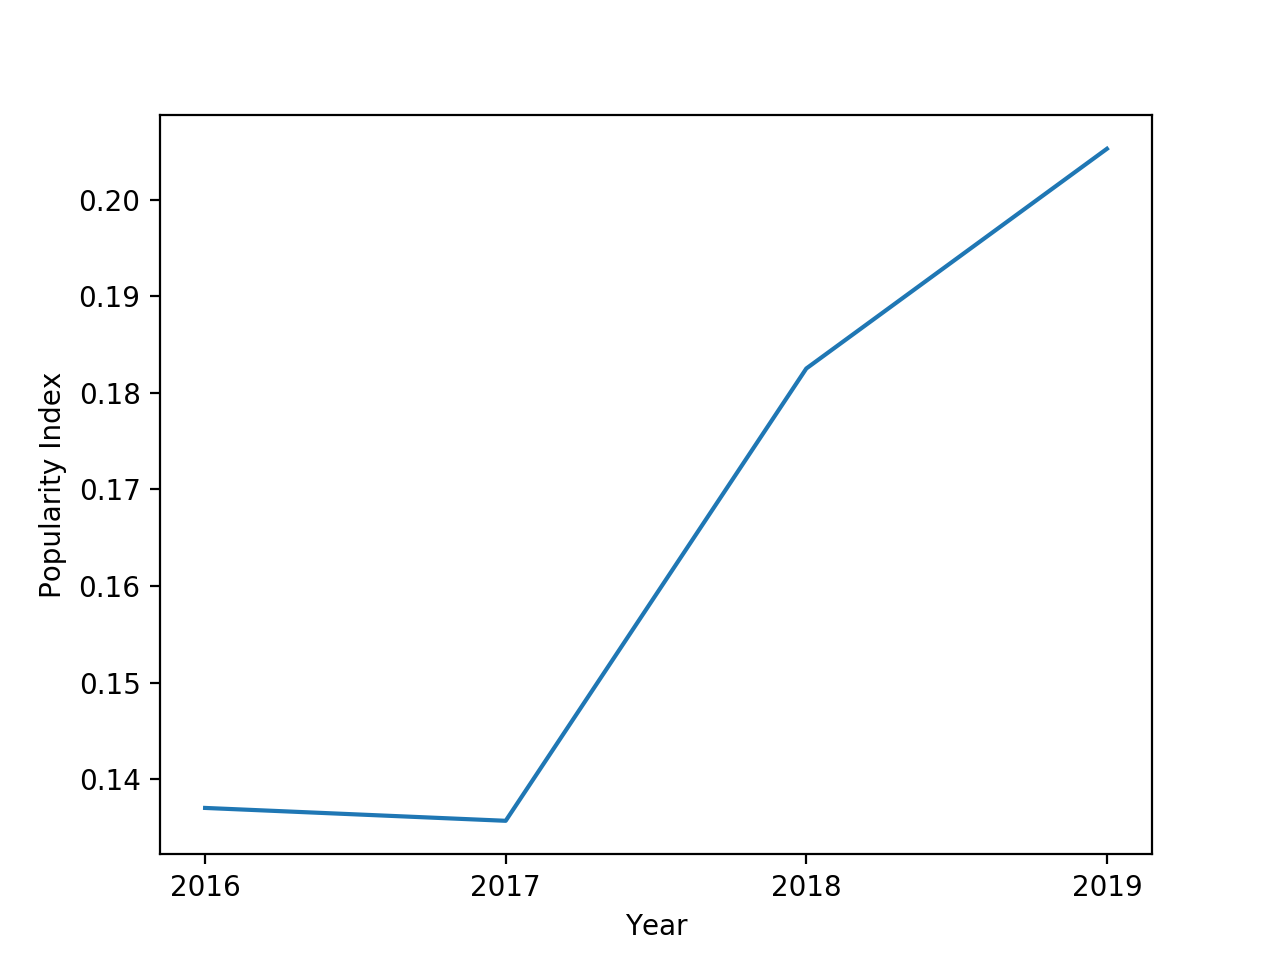

In [87]:
%matplotlib notebook

import matplotlib.pyplot as plt

print(plot_dict['C'])
lists = sorted(plot_dict['C'].items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Popularity Index')
plt.show()

defaultdict(<type 'float'>, {'2017': 0.22773972602739725, '2016': 0.2192039978582902, '2019': 0.3510575523984412, '2018': 0.30710636791259927})


<IPython.core.display.Javascript object>


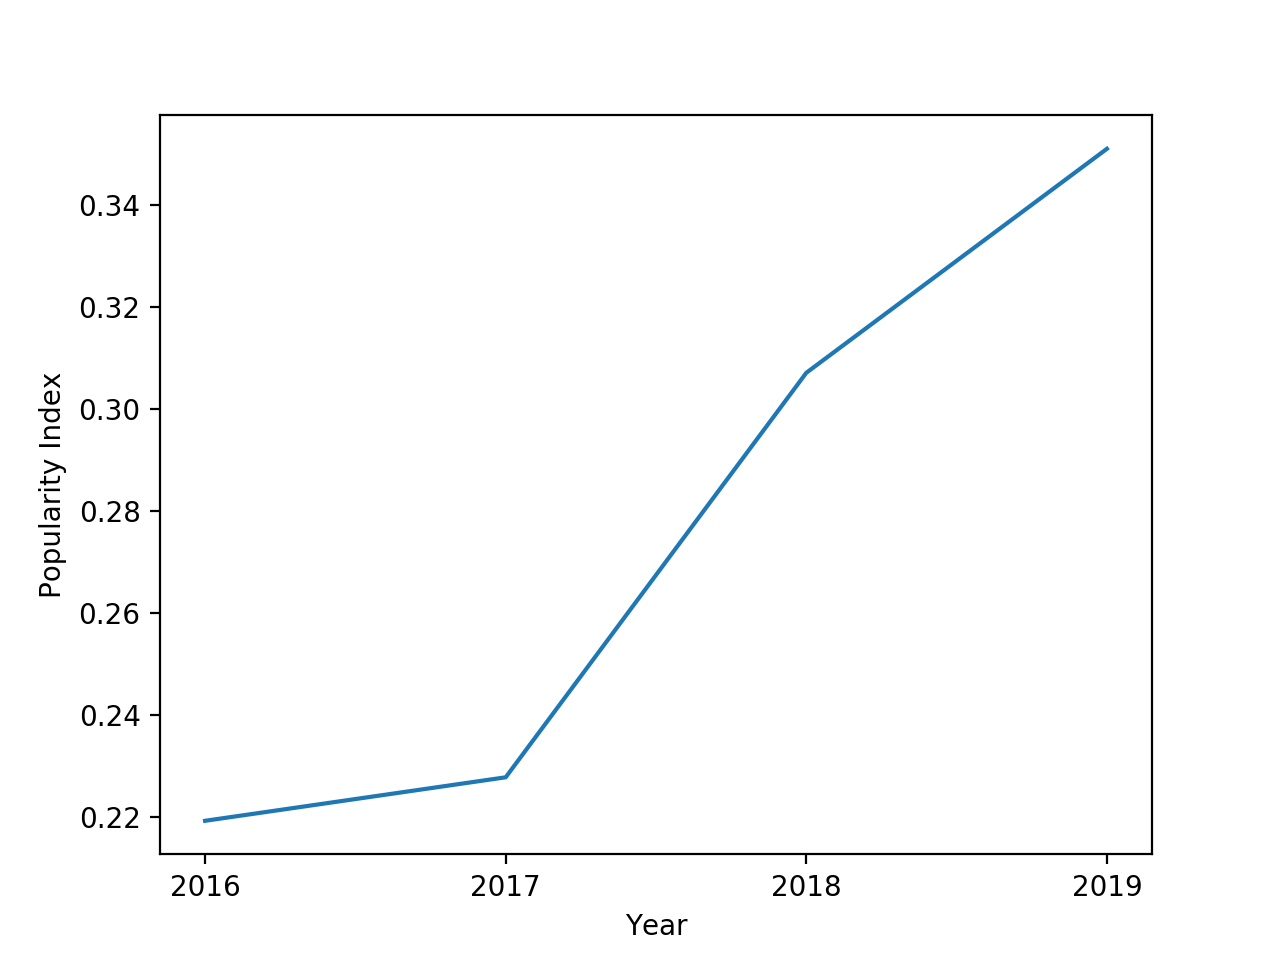

In [88]:
%matplotlib notebook

import matplotlib.pyplot as plt

print(plot_dict['Python'])
lists = sorted(plot_dict['Python'].items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Popularity Index')
plt.show()

defaultdict(<type 'float'>, {'2017': 0.2826120797011208, '2016': 0.3202213100124933, '2019': 0.37887573866937085, '2018': 0.35932426280916496})


<IPython.core.display.Javascript object>


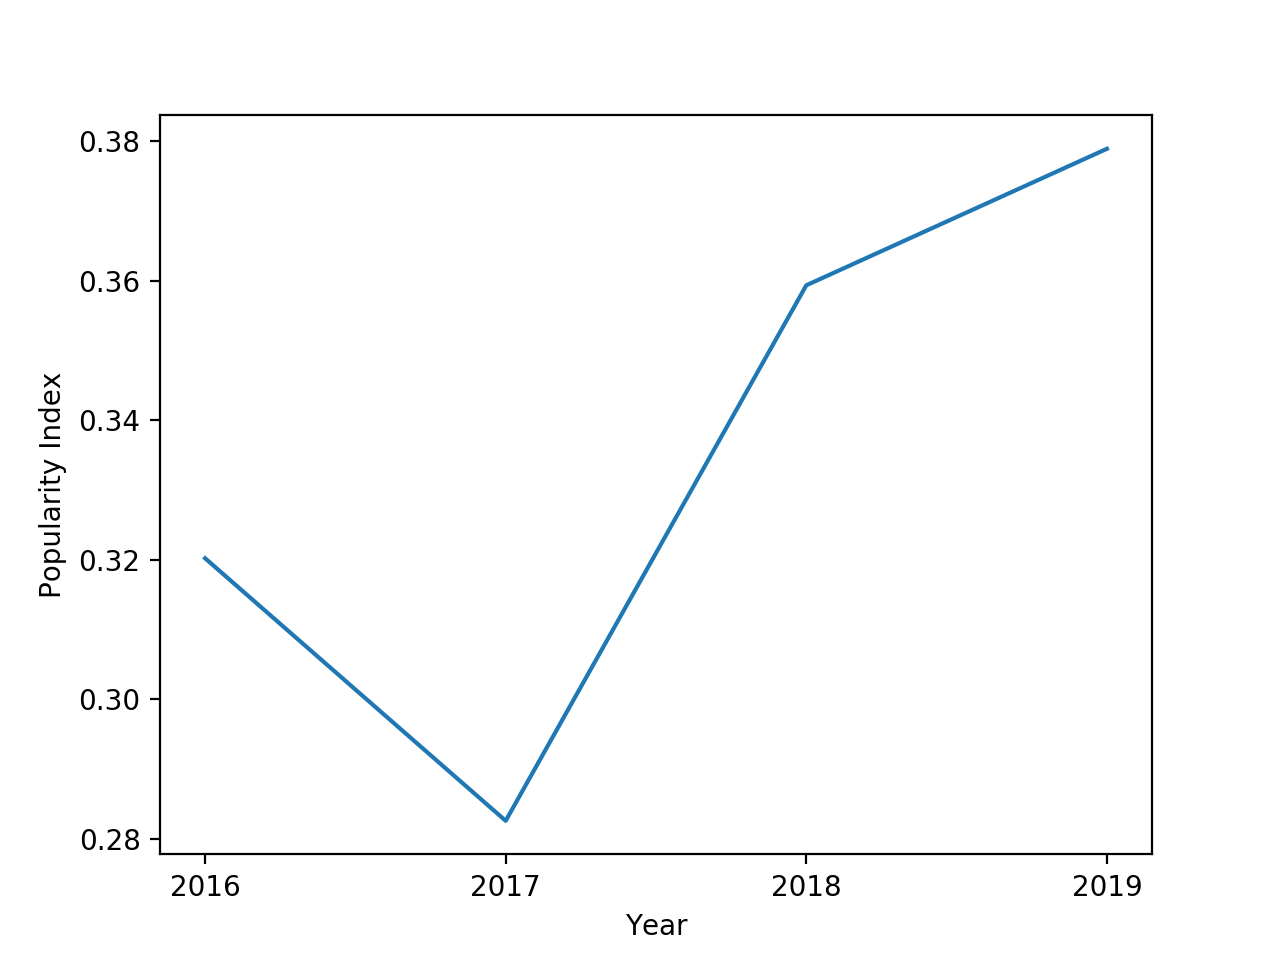

In [89]:
%matplotlib notebook

import matplotlib.pyplot as plt

print(plot_dict['Java'])
lists = sorted(plot_dict['Java'].items())
x, y = zip(*lists) # unpack a list of pairs into two tuples
plt.plot(x, y)
plt.xlabel('Year')
plt.ylabel('Popularity Index')
plt.show()